<a href="https://colab.research.google.com/github/jqln-vc/cadernos_estudos/blob/master/datascience/univesp/com200_formacao_profissional_computacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COM200: Formação Profissional em Computação**

## Semana 2: Introdução ao Google Colab para implementação em Python e Ciência de Dados

In [ ]:
def lingua_secreta():
    palavra = input("Digite uma palavra para codificar: ")
    lista = list(palavra)
    segredo = ""

    for letra in lista:
        if letra == "z":
            segredo += "a"
        elif letra == "Z":
            segredo += "A"
        else:
            segredo += chr(ord(letra) + 1)

    print(segredo)
    return segredo

In [ ]:
def codificador_lingua_secreta(codigo):
    lista = list(codigo)
    segredo = ""

    for letra in lista:
        if letra == "a":
            segredo += "z"
        elif letra == "A":
            segredo += "Z"
        else:
            segredo += chr(ord(letra) - 1)

    print(segredo)
    return segredo

In [ ]:
palavra_secreta = lingua_secreta()

In [ ]:
palavra_decifrada = codificador_lingua_secreta(palavra_secreta)

## Semana 3: Projeto de Desenvolvimento de Software, Algoritmo e Implementação

Sabe-se que o CPF é formado por 9 dígitos + 2 dígitos verificadores, então para calcular os dígitos verificadores devemos seguir os seguintes passos:

1.   Multiplicar os 9 primeiros dígitos pelo índice de sua posição.
2.   Somar os resultados e dividir por 11 e guardar o resto.  
        ```
        Exemplo: 123.456.789-09  
        1*1+2*2+3*3+4*4+5*5+6*6+7*7+8*8+9*9 = 285/11 = 25  
        Resto = 10
        ```

3. A unidade do resto deverá ser igual ao primeiro digito verificador.
Repetir passo 1 com os 10 primeiros dígitos, só que agora começando a sequência de multiplicador em zero.
    ```
        Exemplo: 1*0+2*1+3*2+4*3+5*4+6*5+7*6+8*7+9*8+0*9= 240/11 = 21
        Resto = 9
    ```

4. Se o resto for igual ao segundo dígito verificador, e o resto da operação do passo 2 for igual ao primeiro digito verificador, o CPF é correto.

In [ ]:
def validacao_cpf():
    cpf = input("Digite o CPF sem pontos ou traços: ")
    cpf_lista = list(cpf)

    soma_1 = 0
    soma_2 = 0

    if len(cpf_lista) != 11:
        print("CPF inválido")
        return validacao_cpf()

    for posicao in range(1,10):
        soma_1 += int(cpf_lista[posicao-1]) * posicao

    resto_1 = soma_1 % 11

    for posicao in range(0, 10):
        soma_2 += int(cpf_lista[posicao]) * posicao

    resto_2 = soma_2 % 11

    if (resto_1 == int(cpf_lista[9])) and (resto_2 == int(cpf_lista[10])):
        print(f"Resto 1: {resto_1} & Dígito verificador 1: {cpf_lista[9]}")
        print(f"Resto 2: {resto_2} & Dígito verificador 2: {cpf_lista[10]}")
        return True
    else:
        print("CPF inválido")
        print(f"Resto 1: {resto_1} & Dígito verificador 1: {cpf_lista[9]}")
        print(f"Resto 2: {resto_2} & Dígito verificador 2: {cpf_lista[10]}")
        return False

In [ ]:
validacao_cpf()

## Semana 7: Ciência de dados e Python: IoT e Data Science

### Instalações e importações


In [ ]:
#imports

!pip install requests pandas matplotlib

import requests
import pandas as pd
import matplotlib.pyplot as plt

### Obtendo um dataset de uma URL

Com o método **get()** da biblioteca **requests** importada, fazemos uma requisição HTTP para a URL com GET e obtemos a resposta.  

Ao analisarmos o tipo com **type()**, verificamos que se trata de uma classe específica Response, a seguir exploraremos alguns dos métodos da classe para entender uma resposta de requisição HTTP.



In [ ]:
url = 'https://restcountries.com/v3.1/all'
resposta = requests.get(url)
type(resposta)

HEADERS ou CABEÇALHO

Parte da comunicação entre cliente e servidor, onde são enviadas informações adicionais que auxiliam no processamento da requisição ou resposta. Ele está presente tanto nas **requisições** (feitas pelo cliente) quanto nas **respostas** (enviadas pelo servidor).  

**Estrutura:**  

*   Os headers são compostos por pares chave
, que contêm informações sobre o tipo de conteúdo, autenticação, cache, etc.
*   Cada linha de header segue a sintaxe:       
`Chave: Valor`  

Dentre as chaves, vemos que o tipo de conteúdo recebido, em **Content-Type**, é `application/json`.





In [ ]:
resposta.headers


Com `status_code`, verificamos o status de resposta.

In [ ]:
resposta.status_code

### Análise Exploratória de Dados

É o primeiro passo da Ciência de Dados. Quando obtemos um dataset, precisamos entender como os dados estão distribuídos, o tipo de dado (categórico, quantitativo, série temporal, data, coordenadas, etc), quais os atributos ou colunas, etc.

Como verificamos que o conteúdo está no formato JSON, vamos extraí-lo e converter para um **DataFrame** da biblioteca **Pandas**. A variável **df** é uma nomenclatura popularmente utilizada.  

A seguir, vamos começar a entender o dataset, quais colunas e tipos de informações contidas, a partir de uma amostra das 10 primeiras linhas.



In [ ]:
df = pd.DataFrame(resposta.json())
df.head(10)

,name,tld,cca2,ccn3,cca3,independent,status,unMember,currencies,idd,...,flags,coatOfArms,startOfWeek,capitalInfo,cioc,subregion,fifa,borders,gini,postalCode
0,"{'common': 'South Georgia', 'official': 'South...",[.gs],GS,239,SGS,False,officially-assigned,False,"{'SHP': {'name': 'Saint Helena pound', 'symbol...","{'root': '+5', 'suffixes': ['00']}",...,"{'png': 'https://flagcdn.com/w320/gs.png', 'sv...",{},monday,"{'latlng': [-54.28, -36.5]}",NaN,NaN,NaN,NaN,NaN,NaN
1,"{'common': 'Grenada', 'official': 'Grenada', '...",[.gd],GD,308,GRD,True,officially-assigned,True,"{'XCD': {'name': 'Eastern Caribbean dollar', '...","{'root': '+1', 'suffixes': ['473']}",...,"{'png': 'https://flagcdn.com/w320/gd.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [32.38, -64.68]}",GRN,Caribbean,GRN,NaN,NaN,NaN
2,"{'common': 'Switzerland', 'official': 'Swiss C...",[.ch],CH,756,CHE,True,officially-assigned,True,"{'CHF': {'name': 'Swiss franc', 'symbol': 'Fr.'}}","{'root': '+4', 'suffixes': ['1']}",...,"{'png': 'https://flagcdn.com/w320/ch.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [46.92, 7.47]}",SUI,Western Europe,SUI,"[AUT, FRA, ITA, LIE, DEU]",{'2018': 33.1},"{'format': '####', 'regex': '^(\d{4})$'}"
3,"{'common': 'Sierra Leone', 'official': 'Republ...",[.sl],SL,694,SLE,True,officially-assigned,True,"{'SLL': {'name': 'Sierra Leonean leone', 'symb...","{'root': '+2', 'suffixes': ['32']}",...,"{'png': 'https://flagcdn.com/w320/sl.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [8.48, -13.23]}",SLE,Western Africa,SLE,"[GIN, LBR]",{'2018': 35.7},NaN
4,"{'common': 'Hungary', 'official': 'Hungary', '...",[.hu],HU,348,HUN,True,officially-assigned,True,"{'HUF': {'name': 'Hungarian forint', 'symbol':...","{'root': '+3', 'suffixes': ['6']}",...,"{'png': 'https://flagcdn.com/w320/hu.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [47.5, 19.08]}",HUN,Central Europe,HUN,"[AUT, HRV, ROU, SRB, SVK, SVN, UKR]",{'2018': 29.6},"{'format': '####', 'regex': '^(\d{4})$'}"
5,"{'common': 'Taiwan', 'official': 'Republic of ...","[.tw, .台灣, .台湾]",TW,158,TWN,False,officially-assigned,False,"{'TWD': {'name': 'New Taiwan dollar', 'symbol'...","{'root': '+8', 'suffixes': ['86']}",...,"{'png': 'https://flagcdn.com/w320/tw.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [25.03, 121.52]}",TPE,Eastern Asia,TPE,NaN,NaN,"{'format': '#####', 'regex': '^(\d{5})$'}"
6,"{'common': 'Wallis and Futuna', 'official': 'T...",[.wf],WF,876,WLF,False,officially-assigned,False,"{'XPF': {'name': 'CFP franc', 'symbol': '₣'}}","{'root': '+6', 'suffixes': ['81']}",...,"{'png': 'https://flagcdn.com/w320/wf.png', 'sv...",{},monday,"{'latlng': [-13.95, -171.93]}",NaN,Polynesia,NaN,NaN,NaN,"{'format': '#####', 'regex': '^(986\d{2})$'}"
7,"{'common': 'Barbados', 'official': 'Barbados',...",[.bb],BB,052,BRB,True,officially-assigned,True,"{'BBD': {'name': 'Barbadian dollar', 'symbol':...","{'root': '+1', 'suffixes': ['246']}",...,"{'png': 'https://flagcdn.com/w320/bb.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [13.1, -59.62]}",BAR,Caribbean,BRB,NaN,NaN,"{'format': 'BB#####', 'regex': '^(?:BB)*(\d{5}..."
8,"{'common': 'Pitcairn Islands', 'official': 'Pi...",[.pn],PN,612,PCN,False,officially-assigned,False,"{'NZD': {'name': 'New Zealand dollar', 'symbol...","{'root': '+6', 'suffixes': ['4']}",...,"{'png': 'https://flagcdn.com/w320/pn.png', 'sv...",{},monday,"{'latlng': [-25.07, -130.08]}",NaN,Polynesia,NaN,NaN,NaN,NaN
9,"{'common': 'Ivory Coast', 'official': 'Republi...",[.ci],CI,384,CIV,True,officially-assigned,True,"{'XOF': {'name': 'West African CFA franc', 'sy...","{'root': '+2', 'suffixes': ['25']}",...,"{'png': 'https://flagcdn.com/w320/ci.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [6.82, -5.27]}",CIV,Western Africa,CIV,"[BFA, GHA, GIN, LBR, MLI]",{

Vamos analisar as colunas ou **atributos** do dataset, e os tipos de cada uma delas. Entender a estrutura dos dados é importante para conseguir manipulá-los (e evitar frustrações!).

In [ ]:
for coluna in df.columns:
    print(f"coluna: {coluna} | {type(coluna)} | dtype: {df[coluna].dtype}")

coluna: name | <class 'str'> | dtype: object
coluna: tld | <class 'str'> | dtype: object
coluna: cca2 | <class 'str'> | dtype: object
coluna: ccn3 | <class 'str'> | dtype: object
coluna: cca3 | <class 'str'> | dtype: object
coluna: independent | <class 'str'> | dtype: object
coluna: status | <class 'str'> | dtype: object
coluna: unMember | <class 'str'> | dtype: bool
coluna: currencies | <class 'str'> | dtype: object
coluna: idd | <class 'str'> | dtype: object
coluna: capital | <class 'str'> | dtype: object
coluna: altSpellings | <class 'str'> | dtype: object
coluna: region | <class 'str'> | dtype: object
coluna: languages | <class 'str'> | dtype: object
coluna: translations | <class 'str'> | dtype: object
coluna: latlng | <class 'str'> | dtype: object
coluna: landlocked | <class 'str'> | dtype: bool
coluna: area | <class 'str'> | dtype: float64
coluna: demonyms | <class 'str'> | dtype: object
coluna: flag | <class 'str'> | dtype: object
coluna: maps | <class 'str'> | dtype: object
col

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          250 non-null    object 
 1   tld           249 non-null    object 
 2   cca2          250 non-null    object 
 3   ccn3          249 non-null    object 
 4   cca3          250 non-null    object 
 5   independent   249 non-null    object 
 6   status        250 non-null    object 
 7   unMember      250 non-null    bool   
 8   currencies    247 non-null    object 
 9   idd           250 non-null    object 
 10  capital       246 non-null    object 
 11  altSpellings  250 non-null    object 
 12  region        250 non-null    object 
 13  languages     249 non-null    object 
 14  translations  250 non-null    object 
 15  latlng        250 non-null    object 
 16  landlocked    250 non-null    bool   
 17  area          250 non-null    float64
 18  demonyms      249 non-null    

Uma tarefa importante é "limpar os dados", de acordo com o interesse, portanto vamos criar um dataset com somente algumas colunas. E, em seguida, vamos modificar os valores para alguns tipos mais fáceis de lidar.

In [ ]:
df = df[['name','independent', 'unMember', 'region', 'subregion', 'continents']]
df.head()

,name,independent,unMember,region,subregion,continents
0,"{'common': 'South Georgia', 'official': 'South...",False,False,Antarctic,NaN,[Antarctica]
1,"{'common': 'Grenada', 'official': 'Grenada', '...",True,True,Americas,Caribbean,[North America]
2,"{'common': 'Switzerland', 'official': 'Swiss C...",True,True,Europe,Western Europe,[Europe]
3,"{'common': 'Sierra Leone', 'official': 'Republ...",True,True,Africa,Western Africa,[Africa]
4,"{'common': 'Hungary', 'official': 'Hungary', '...",True,True,Europe,Central Europe,[Europe]


Com o método **iterrows()**, faremos uma iteração pelas linhas, em que:

*   **i**: nº de índice da linha
*   **row**: conteúdo da linha

In [ ]:
for i, row in df.iterrows():
    print(f"i: {i} | row: {row}")

    # para cada linha i, vamos substituir o valor da coluna 'name' com o valor da chave 'common'
    df.loc[i, 'name'] = row['name']['common']

i: 0 | row: name           {'common': 'South Georgia', 'official': 'South...
independent                                                False
unMember                                                   False
region                                                 Antarctic
subregion                                                    NaN
continents                                          [Antarctica]
Name: 0, dtype: object
i: 1 | row: name           {'common': 'Grenada', 'official': 'Grenada', '...
independent                                                 True
unMember                                                    True
region                                                  Americas
subregion                                              Caribbean
continents                                       [North America]
Name: 1, dtype: object
i: 2 | row: name           {'common': 'Switzerland', 'official': 'Swiss C...
independent                                                 True
unMember

Vamos verificar como ficou o dataset.

In [ ]:
df.head()

,name,independent,unMember,region,subregion,continents
0,South Georgia,False,False,Antarctic,NaN,[Antarctica]
1,Grenada,True,True,Americas,Caribbean,[North America]
2,Switzerland,True,True,Europe,Western Europe,[Europe]
3,Sierra Leone,True,True,Africa,Western Africa,[Africa]
4,Hungary,True,True,Europe,Central Europe,[Europe]


#### Visualizações com plotagens

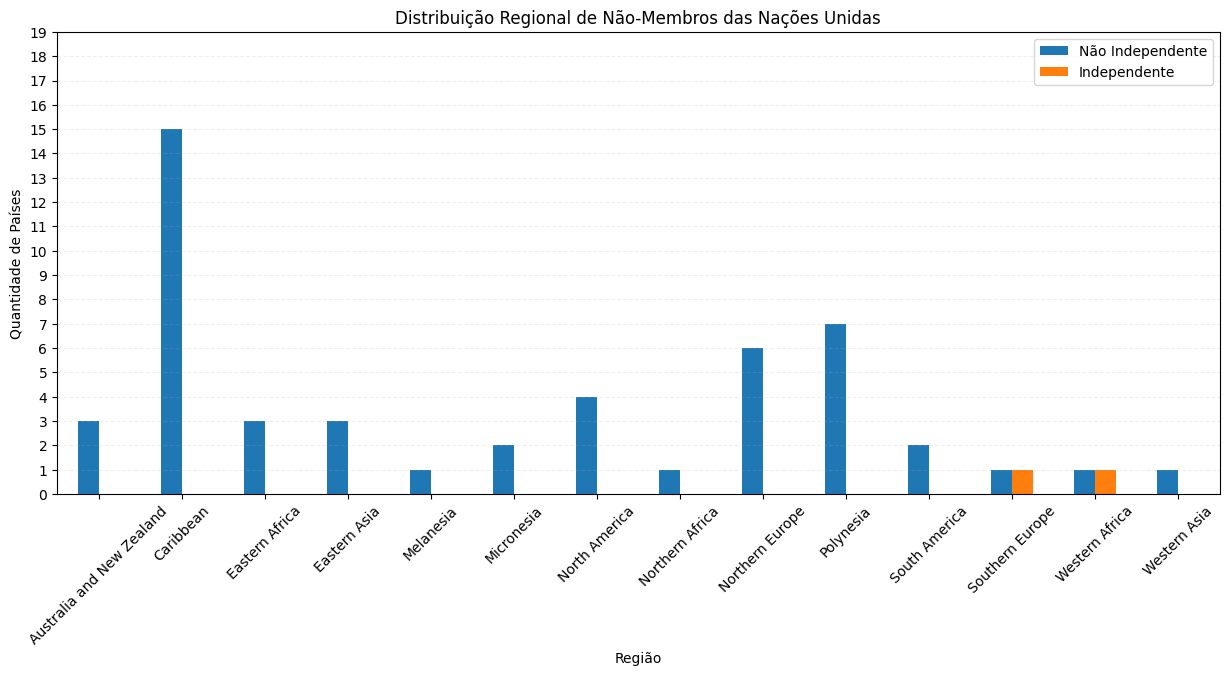

In [ ]:
# @title Distribuição Regional de Não-Membros das Nações Unidas

regiao_naoONU = df[(df['unMember'] == False)]
quantidade_regiao_naoONU = regiao_naoONU.groupby(['subregion', 'independent', 'unMember'])['name'].count().unstack().unstack()

quantidade_regiao_naoONU.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Região')
plt.ylabel('Quantidade de Países')
plt.yticks(range(0, 20))
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.title('Distribuição Regional de Não-Membros das Nações Unidas')
plt.xticks(rotation=45)
plt.legend(['Não Independente', 'Independente'])
plt.show()


A partir do gráfico, notamos que somente 2 países dentre os não pertencentes às Nações Unidas são independentes. Vejamos quais são eles:

In [ ]:
regiao_naoONU[(regiao_naoONU['independent'] == True) & (regiao_naoONU['unMember'] == False)]

,name,independent,unMember,region,subregion,continents
53,Guinea-Bissau,True,False,Africa,Western Africa,[Africa]
169,Vatican City,True,False,Europe,Southern Europe,[Europe]


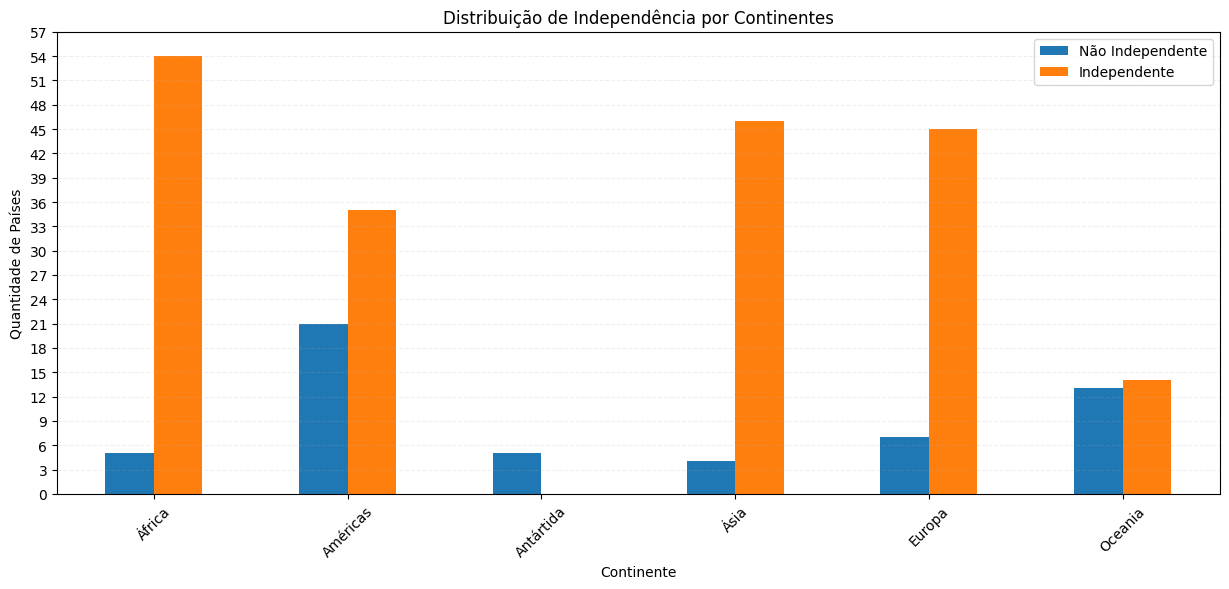

In [ ]:
# @title Distribuição de Independência por Continentes

independencia_continentes = df.groupby(['region', 'independent'])['name'].count().unstack()
independencia_continentes.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Continente')
plt.ylabel('Quantidade de Países')
plt.title('Distribuição de Independência por Continentes')
plt.xticks(ticks=range(0,6), labels=['África', 'Américas', 'Antártida','Ásia', 'Europa', 'Oceania'],rotation=45)
plt.yticks(range(0, 60, 3))
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.legend(['Não Independente', 'Independente'])
plt.show()

Se analisarmos o dataset com os países categorizados na região das Américas, notamos que a maior parte dos países não-independentes se encontram nas Ilhas Caribenhas.

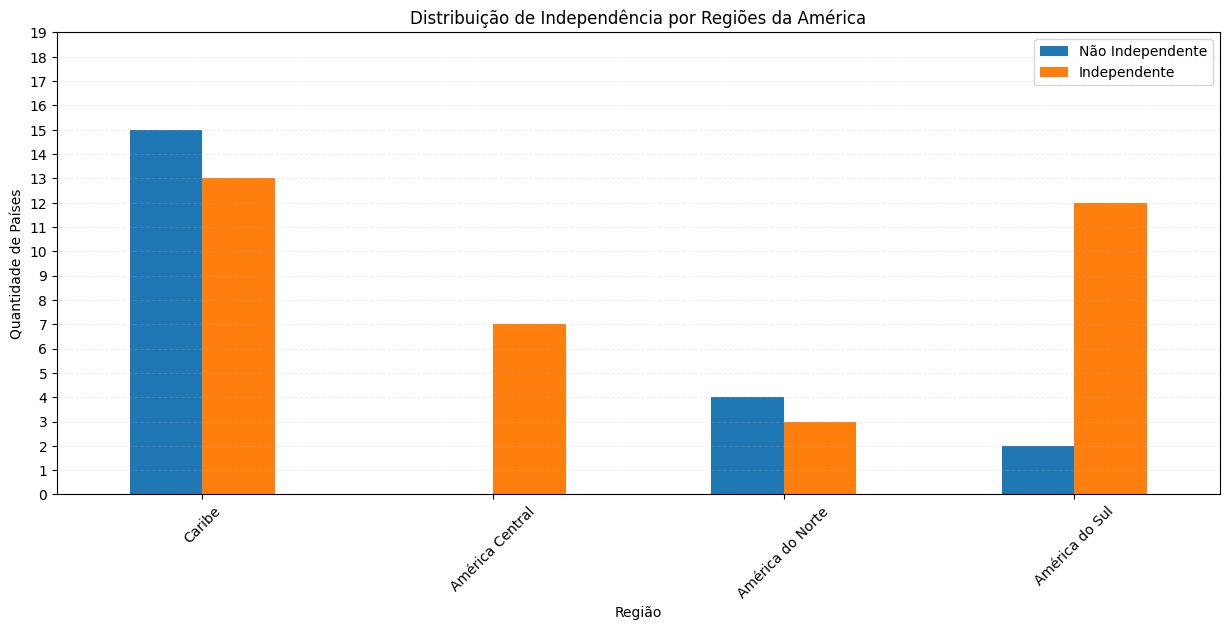

In [ ]:
# @title Distribuição de Independência por Regiões da América

independencia_regiao = df[(df['region'] == 'Americas')].groupby(['subregion', 'independent'])['name'].count().unstack()
independencia_regiao.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Região')
plt.ylabel('Quantidade de Países')
plt.title('Distribuição de Independência por Regiões da América')
plt.xticks(ticks=range(0,4), labels=['Caribe', 'América Central', 'América do Norte', 'América do Sul'], rotation=45)
plt.yticks(range(0, 20))
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.legend(['Não Independente', 'Independente'])
plt.show()

In [ ]:
df[(df['region'] == 'Americas')]

,name,independent,unMember,region,subregion,continents
1,Grenada,True,True,Americas,Caribbean,[North America]
7,Barbados,True,True,Americas,Caribbean,[North America]
15,Saint Kitts and Nevis,True,True,Americas,Caribbean,[North America]
17,Caribbean Netherlands,False,False,Americas,Caribbean,[North America]
24,Mexico,True,True,Americas,North America,[North America]
30,Saint Barthélemy,False,False,Americas,Caribbean,[North America]
41,Peru,True,True,Americas,South America,[South America]
45,Aruba,False,False,Americas,Caribbean,[North America]
59,Montserrat,False,False,Americas,Caribbean,[North America]
60,United States Virgin Islands,False,False,Americas,Caribbean,[North America]
